In [22]:
import os
import numpy as np
import pandas as pd

import prepare_data

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils

In [83]:
data_path = os.path.join("ICHI14_dataset\data")
patient_list = ['002','003','005','007','08a','08b','09a','09b', '10a','011','013','014','15a','15b','016',
            '017','018','019','020','021','022','023','025','026','027','028','029','030','031','032',
            '033','034','035','036','037','038','040','042','043','044','045','047','048','049','051']
#statistics_list = ["std_x", "std_y", "std_z", "ptp_x", "ptp_y", "ptp_z", "rms_x", "rms_y", "rms_z"]
statistics_list = ["std_x", "std_y", "std_z", "rms_x", "rms_y", "rms_z"]
file_name = "multy_class_features_60s.csv"

In [3]:
#prepare_data.save_statistic_features(patient_list, sorce_path="ICHI14_dataset\data", 
#                                     save_path="multy_class_features_60s.csv",
#                                     window_len=60, sleep_stages=True)

In [37]:
train_patient_list, test_patient_list = train_test_split(patient_list, random_state=152, test_size=0.3)

In [86]:
X_train, y_train = prepare_data.load_statistic_features(train_patient_list,
                                                        file_name=file_name,
                                                        statistics_list=statistics_list)

X_test, y_test = prepare_data.load_statistic_features(test_patient_list, 
                                                      file_name=file_name,
                                                      statistics_list=statistics_list)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15850, 6)
(15850,)
(7355, 6)
(7355,)


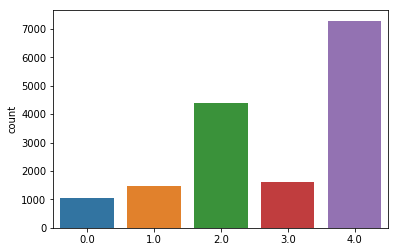

In [88]:
sns.countplot(y_train)

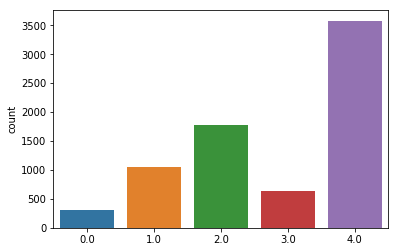

In [89]:
sns.countplot(y_test)

### 1. Lin. Reg, only one window

In [90]:
%%time
model1 = LogisticRegression()
model1.fit(X_train, y_train)

Wall time: 449 ms


In [91]:
y_predict = model1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model1.predict(X_test)

print("\nTrain set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      1059
        1.0       0.00      0.00      0.00      1488
        2.0       0.38      0.41      0.39      4395
        3.0       0.00      0.00      0.00      1623
        4.0       0.54      0.82      0.65      7285

avg / total       0.35      0.49      0.41     15850

Confussion matrix: 
 [[   0    0  485    0  574]
 [   0    0  629    0  859]
 [   0    0 1780    0 2615]
 [   0    0  527    0 1096]
 [   0    0 1285    0 6000]]

Accuracy on train set:  0.4908517350157729

Train set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       314
        1.0       0.00      0.00      0.00      1049
        2.0       0.25      0.26      0.25      1773
        3.0       0.00      0.00      0.00       640
        4.0       0.52      0.80      0.63      3579

avg / total       0.31      0.45      0.37      7355

Confus

C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 = 0.32, acc = 0.4866  std
f1 = 0.37, acc = 0.4508  std ptp rms

### 2. Lin. Reg, several windows features for one window

In [92]:
X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                 file_name=file_name,
                                                                 statistics_list=statistics_list,
                                                                 n_others_windows=16)

X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list,                                             
                                                                file_name=file_name, 
                                                                statistics_list=statistics_list,
                                                                n_others_windows=16)

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15354, 102)
(15354,)
(7131, 102)
(7131,)


In [94]:
%%time
model3 = LogisticRegression()
model3.fit(X_train, y_train)

Wall time: 18.3 s


In [95]:
y_predict = model3.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model3.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       1.00      0.00      0.01      1059
        1.0       0.14      0.00      0.00      1488
        2.0       0.41      0.70      0.52      4395
        3.0       0.00      0.00      0.00      1623
        4.0       0.65      0.75      0.69      6789

avg / total       0.49      0.53      0.46     15354

Confussion matrix: 
 [[   4    1  765    0  289]
 [   0    1 1217    0  270]
 [   0    2 3081    0 1312]
 [   0    2  770    0  851]
 [   0    1 1723    0 5065]]

Accuracy on train set:  0.5308714341539664

Test set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       314
        1.0       0.06      0.00      0.00      1049
        2.0       0.32      0.56      0.41      1765
        3.0       0.00      0.00      0.00       640
        4.0       0.66      0.78      0.71      3363

avg / total       0.40      0.51      0.44      7131

Confuss

C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 = 0.43, acc = 0.4937, 20 windows, std ptp rms

f1 = 0.44, acc =  0.5070, 20 windows, std rms

### The problem is imbalanced classes 

## OVERSAMPLING

In [96]:
train_size = y_train.shape[0]

awake = np.sum(y_train[y_train == 4]) / 4
rem = np.sum(y_train[y_train == 0] + 1)
no_rem1 = np.sum(y_train[y_train == 1])
no_rem2 = np.sum(y_train[y_train == 2]) / 2 
no_rem3 = np.sum(y_train[y_train == 3]) / 3

#print(awake)
#print(rem)
#print(no_rem1)
#print(no_rem2)
#print(no_rem3)

In [97]:
print(awake / train_size)
print(rem / train_size)
print(no_rem1 / train_size)
print(no_rem2 / train_size)
print(no_rem3 / train_size)

0.44216490816725285
0.06897225478702618
0.09691285658460336
0.28624462680734664
0.105705353653771


In [98]:
def n_repeats(y):
    train_size = y.shape[0]
    repeats = np.zeros(y.shape)
    
    awake = np.sum(y_train[y_train == 4]) / 4
    rem = np.sum(y_train[y_train == 0] + 1)
    no_rem1 = np.sum(y_train[y_train == 1])
    no_rem2 = np.sum(y_train[y_train == 2]) / 2 
    no_rem3 = np.sum(y_train[y_train == 3]) / 3
    
    repeats[y == 4] = 1
    repeats[y == 0] = awake // rem
    repeats[y == 1] = awake // no_rem1
    repeats[y == 2] = awake // no_rem2
    repeats[y == 3] = awake // no_rem3
    
    return repeats.astype(int)

In [99]:
repeats = n_repeats(y_train)

In [100]:
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)

In [101]:
print(y_train.shape)
print(X_train.shape)

(29982,)
(29982, 102)


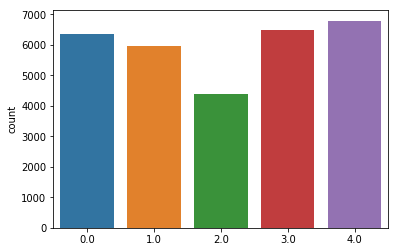

In [102]:
sns.countplot(y_train)

### 3. Lin. Reg, only one window

In [63]:
%%time
model1 = LogisticRegression(C=0.1)
model1.fit(X_train, y_train)

Wall time: 2min 29s


In [64]:
y_predict = model1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model1.predict(X_test)

print("\nTrain set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.37      0.49      0.42      6354
        1.0       0.37      0.50      0.42      5944
        2.0       0.36      0.03      0.06      4395
        3.0       0.40      0.40      0.40      6488
        4.0       0.61      0.58      0.59      6668

avg / total       0.43      0.43      0.40     29849

Confussion matrix: 
 [[3114 1848  108  822  462]
 [1708 2984   16 1008  228]
 [1439 1292  151 1029  484]
 [1328 1136   88 2620 1316]
 [ 736  873   57 1143 3859]]

Accuracy on train set:  0.4264129451572917

Train set result: 
             precision    recall  f1-score   support

        0.0       0.09      0.40      0.14       314
        1.0       0.27      0.41      0.33      1049
        2.0       0.31      0.03      0.06      1763
        3.0       0.11      0.27      0.16       640
        4.0       0.80      0.55      0.65      3309

avg / total       0.51      0.37      0.39      7075

Confus

f1 = 0.35, acc = 0.35, std

f1 = 0.39, acc = 0.3707, std + ptp + rms

### 4. Lin. Reg, several windows features for one window

(29982, 153)
(29982,)
(7131, 153)
(7131,)


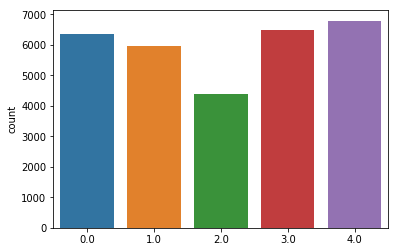

In [69]:
X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                 file_name=file_name,
                                                                 statistics_list=statistics_list,
                                                                 n_others_windows=16)

X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list, 
                                                                statistics_list=statistics_list,
                                                                file_name=file_name, 
                                                                n_others_windows=16)

repeats = n_repeats(y_train)
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)
sns.countplot(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [67]:
%%time
model3 = LogisticRegression()
model3.fit(X_train, y_train)

Wall time: 2min 27s


In [68]:
y_predict = model3.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model3.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.37      0.51      0.43      6354
        1.0       0.36      0.47      0.41      5944
        2.0       0.36      0.04      0.07      4395
        3.0       0.40      0.39      0.39      6488
        4.0       0.60      0.58      0.59      6668

avg / total       0.42      0.42      0.40     29849

Confussion matrix: 
 [[3258 1710  114  792  480]
 [1936 2804   16  960  228]
 [1502 1260  158  989  486]
 [1360 1172   92 2528 1336]
 [ 751  889   58 1107 3863]]

Accuracy on train set:  0.42249321585312744

Test set result: 
             precision    recall  f1-score   support

        0.0       0.09      0.40      0.14       314
        1.0       0.27      0.41      0.32      1049
        2.0       0.33      0.03      0.06      1763
        3.0       0.11      0.27      0.16       640
        4.0       0.80      0.56      0.65      3309

avg / total       0.51      0.37      0.39      7075

Confus

f1 = 0.42, acc = 0.4198, 16 windows

f1 = 0.43, acc = 0.4398, 32 windows

f1 = 0.43, acc = 0.4279, 40 windows

f1 = 0.39, acc = 0.3713, 20 windows, std + ptp + rms


### 5. GradientBoostingClassifier, several windows features for one window

In [103]:
%%time
model4 = GradientBoostingClassifier(n_estimators=50, max_depth=7)
model4.fit(X_train, y_train)

Wall time: 5min


In [104]:
y_predict = model4.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model4.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96      6354
        1.0       0.91      0.99      0.95      5952
        2.0       0.94      0.74      0.83      4395
        3.0       0.90      0.95      0.93      6492
        4.0       0.95      0.89      0.92      6789

avg / total       0.93      0.92      0.92     29982

Confussion matrix: 
 [[6336    0    0   18    0]
 [   4 5904    4   16   24]
 [ 181  357 3257  318  282]
 [ 120   92   72 6176   32]
 [ 146  121  149  318 6055]]

Accuracy on train set:  0.9248215596024282

Test set result: 
             precision    recall  f1-score   support

        0.0       0.09      0.09      0.09       314
        1.0       0.25      0.25      0.25      1049
        2.0       0.32      0.21      0.25      1765
        3.0       0.11      0.17      0.13       640
        4.0       0.65      0.71      0.68      3363

avg / total       0.44      0.44      0.44      7131

Confuss

f1-score = 0.43

f1-score = 0.45 n_estimators=30, max_depth=6

f1-score = 0.48 , acc = 0.5002 (n_estimators=50, max_depth=10) 16 windows

f1-score = 0.47 , acc = 0.4593 (n_estimators=50, max_depth=6), 32 windows

f1-score =  0.43 , acc = 0.4278 (n_estimators=50, max_depth=6) 16 windows, std + ptp + rms

f1-score =  0.44 , acc = 0.4407 (n_estimators=50, max_depth=6) 16 windows, std + rms


### 6. SVM, several windows features for one window

In [155]:
%%time
model6 = SVC(C=0.5)
model6.fit(X_train, y_train)

Wall time: 4min 4s


In [156]:
y_predict = model6.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model6.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.75      0.58      0.65      6354
        1.0       0.44      0.91      0.59      5952
        2.0       0.80      0.16      0.27      4395
        3.0       0.80      0.71      0.76      6492
        4.0       0.83      0.75      0.79      6789

avg / total       0.73      0.65      0.64     29982

Confussion matrix: 
 [[3684 2592    0   78    0]
 [ 264 5432   36  216    4]
 [ 384 1808  701  473 1029]
 [ 272 1544   40 4632    4]
 [ 295  973   96  357 5068]]

Accuracy on train set:  0.6509572410112734

Test set result: 
             precision    recall  f1-score   support

        0.0       0.15      0.19      0.17       314
        1.0       0.32      0.59      0.41      1049
        2.0       0.34      0.04      0.08      1765
        3.0       0.12      0.12      0.12       640
        4.0       0.67      0.78      0.72      3363

avg / total       0.46      0.48      0.44      7131

Confuss

f1 = 0.41 C=0.1

f1 = 0.44, acc = 0.4840,  C=0.5

### 7. RNN, several windows features for one window

In [16]:

from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Activation, Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from keras.layers import LSTM, Bidirectional

from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.utils import np_utils

In [17]:
train_patient_list, test_patient_list = train_test_split(patient_list, random_state=152, test_size=0.3)
test_patient_list, valid_patient_list = train_test_split(test_patient_list, random_state=151, test_size=0.5)

(30106, 13, 3)
(30106,)
(3623, 13, 3)
(3623,)
(3564, 13, 3)
(3564,)
One=hot shapes
(30106, 5)
(3623, 5)
(3564, 5)


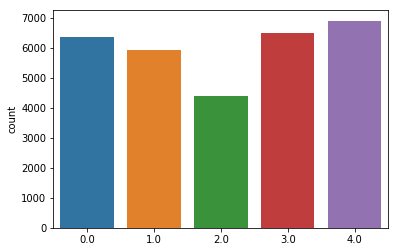

In [18]:
X_train, y_train = prepare_data.load_stat_features_others_windows_rnn(train_patient_list,
                                                                 file_name=file_name,
                                                                 n_others_windows=12)

X_valid, y_valid = prepare_data.load_stat_features_others_windows_rnn(valid_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=12)


X_test, y_test = prepare_data.load_stat_features_others_windows_rnn(test_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=12)

repeats = n_repeats(y_train)
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)
sns.countplot(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

print("One=hot shapes")
Y_train = np_utils.to_categorical(y_train, 5)
print(Y_train.shape)
Y_valid = np_utils.to_categorical(y_valid, 5)
print(Y_valid.shape)
Y_test = np_utils.to_categorical(y_test, 5)
print(Y_test.shape)

In [19]:
RNN = Sequential()

RNN.add(LSTM(13, dropout=0.2, recurrent_dropout=0.1, input_shape=(13, 3)))
RNN.add(Dense(5, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=l2(0.1)))

RNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(RNN.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13)                884       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 70        
Total params: 954
Trainable params: 954
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
callbacks = [ModelCheckpoint('RNN_multy_5_weights.hdf5', monitor='val_loss', save_best_only=True), 
             EarlyStopping(monitor='val_loss', patience=4)]

In [21]:
%%time

RNN.fit(X_train, Y_train,
       shuffle=True,
       batch_size=32, 
       epochs=10, 
       validation_data=(X_valid, Y_valid), 
       callbacks=callbacks,
       verbose=1)

Train on 30106 samples, validate on 3623 samples
Epoch 1/10
30106/30106 [==============================] - 50s 2ms/step - loss: 1.7034 - acc: 0.3311 - val_loss: 1.4373 - val_acc: 0.4560
Epoch 2/10
30106/30106 [==============================] - 57s 2ms/step - loss: 1.5058 - acc: 0.3582 - val_loss: 1.4171 - val_acc: 0.4593
Epoch 3/10
30106/30106 [==============================] - 40s 1ms/step - loss: 1.4975 - acc: 0.3596 - val_loss: 1.4099 - val_acc: 0.4449
Epoch 4/10
30106/30106 [==============================] - 73s 2ms/step - loss: 1.4929 - acc: 0.3601 - val_loss: 1.4104 - val_acc: 0.4452
Epoch 5/10
30106/30106 [==============================] - 35s 1ms/step - loss: 1.4908 - acc: 0.3649 - val_loss: 1.4166 - val_acc: 0.4303
Epoch 6/10
30106/30106 [==============================] - 70s 2ms/step - loss: 1.4894 - acc: 0.3661 - val_loss: 1.4074 - val_acc: 0.4430
Epoch 7/10
30106/30106 [==============================] - 72s 2ms/step - loss: 1.4884 - acc: 0.3670 - val_loss: 1.4049 - val_acc:

In [24]:
scores = RNN.evaluate(X_test, Y_test)
print("Test accuracy =", scores[1])

3564/3564 [==============================] - 2s 612us/step
Test accuracy = 0.4276094276094276


In [28]:
y_predict = np.argmax(RNN.predict(X_test), axis=1)


In [29]:
metrics.f1_score(y_test, y_predict, average='micro')  

0.4276094276094276

In [30]:
metrics.f1_score(y_test, y_predict, average='macro')  

C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.28555425209995916

In [27]:
metrics.f1_score(y_test, y_predict, average='weighted') 

C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.39997119798341346

In [32]:
y_predict = np.argmax(RNN.predict(X_train), axis=1)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = np.argmax(RNN.predict(X_test), axis=1)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.31      0.08      0.13      6354
        1.0       0.35      0.65      0.46      5952
        2.0       0.00      0.00      0.00      4395
        3.0       0.29      0.45      0.35      6492
        4.0       0.55      0.58      0.57      6913

avg / total       0.32      0.38      0.32     30106

Confussion matrix: 
 [[ 528 2676    0 2466  684]
 [ 300 3848    0 1320  484]
 [ 298 1780    0 1793  524]
 [ 332 1632    0 2940 1588]
 [ 234  971    0 1678 4030]]

Accuracy on train set:  0.3768683983259151


C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Test set result: 
             precision    recall  f1-score   support

        0.0       0.11      0.11      0.11       164
        1.0       0.26      0.76      0.39       397
        2.0       0.00      0.00      0.00      1032
        3.0       0.14      0.39      0.21       331
        4.0       0.80      0.66      0.72      1640

avg / total       0.42      0.43      0.40      3564

Confussion matrix: 
 [[  18   84    0   57    5]
 [  20  301    0   67    9]
 [  65  487    0  317  163]
 [  22   94    0  128   87]
 [  36  192    0  335 1077]]

Accuracy on test set:  0.4276094276094276


C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Cross validation

In [33]:
kf = KFold(n_splits=5, random_state=5, shuffle=True) # Define the split - into 3 folds #5
kf.get_n_splits(patient_list) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(patient_list):
    #train_patient_list = [patient_list[i] for i in train_index]
    test_patient_list = [patient_list[i] for i in test_index]
    
    print(test_patient_list)

['007', '08a', '09a', '025', '028', '029', '031', '044', '048']
['002', '005', '08b', '021', '026', '027', '032', '034', '049']
['003', '013', '014', '15b', '020', '022', '035', '036', '045']
['09b', '15a', '017', '019', '023', '037', '042', '047', '051']
['10a', '011', '016', '018', '030', '033', '038', '040', '043']


In [34]:
n_others_windows = 32

### Gradient Boosting

In [35]:
%%time
accuracy_list = []
f1_list = []
for train_index, test_index in kf.split(patient_list):
    train_patient_list = [patient_list[i] for i in train_index]
    test_patient_list = [patient_list[i] for i in test_index]
    
    X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                      file_name=file_name,
                                                                      n_others_windows=n_others_windows)
    X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list,
                                                                    file_name=file_name, 
                                                                    n_others_windows=n_others_windows)
    
    
    repeats = n_repeats(y_train)
    y_train = np.repeat(y_train, repeats, axis=0)
    X_train = np.repeat(X_train, repeats, axis=0)
    print(X_train.shape)
    
    model3 = GradientBoostingClassifier(n_estimators=30, max_depth=6)
    model3.fit(X_train, y_train)
    
    y_predict = model3.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, y_predict)
    f1_train = metrics.f1_score(y_train, y_predict, average="weighted")
    print("\nAccuracy on train set: ", accuracy_train)
    #print("F1 score on train set: ", f1_train)
    
    y_predict = model3.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    f1_test = metrics.f1_score(y_test, y_predict, average="weighted")
    accuracy_list.append(accuracy)
    print(metrics.classification_report(y_test, y_predict))
    f1_list.append(f1_test)
    print("Accuracy on test set: ", accuracy)
    #print("F1 score on test set: ", f1_test)
    
    #print(metrics.classification_report(y_test, y_predict))
    #print(test_patient_list)

print("\nMean accuracy =", np.mean(accuracy_list))  
print("Mean f1 score =", np.mean(f1_list)) 

(33641, 51)

Accuracy on train set:  0.6853541809101988
             precision    recall  f1-score   support

        0.0       0.05      0.17      0.08       202
        1.0       0.15      0.42      0.23       441
        2.0       0.23      0.04      0.07      1103
        3.0       0.13      0.28      0.18       438
        4.0       0.78      0.49      0.60      2182

avg / total       0.48      0.33      0.36      4366

Accuracy on test set:  0.3321117727897389
(32465, 51)

Accuracy on train set:  0.6904666563991991
             precision    recall  f1-score   support

        0.0       0.08      0.17      0.11       269
        1.0       0.30      0.56      0.39       530
        2.0       0.33      0.10      0.16      1013
        3.0       0.14      0.26      0.18       487
        4.0       0.80      0.66      0.72      2583

avg / total       0.54      0.47      0.48      4882

Accuracy on test set:  0.4651782056534207
(36520, 51)

Accuracy on train set:  0.7069277108433735


f1 = 0.3892, acc = 0.3841, 16 windows, n_estimators=30, max_depth=6